In [1]:
# Import package for getting dataset example
import wooldridge as woo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm

import math

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Descriptive Analysis

## A. Discrete Distributions: Frequencies and Contingency Tables

In [2]:
affairs = woo.dataWoo('affairs') # Return dataframe
print(affairs.info())
affairs.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        601 non-null    int64  
 1   male      601 non-null    int64  
 2   age       601 non-null    float64
 3   yrsmarr   601 non-null    float64
 4   kids      601 non-null    int64  
 5   relig     601 non-null    int64  
 6   educ      601 non-null    int64  
 7   occup     601 non-null    int64  
 8   ratemarr  601 non-null    int64  
 9   naffairs  601 non-null    int64  
 10  affair    601 non-null    int64  
 11  vryhap    601 non-null    int64  
 12  hapavg    601 non-null    int64  
 13  avgmarr   601 non-null    int64  
 14  unhap     601 non-null    int64  
 15  vryrel    601 non-null    int64  
 16  smerel    601 non-null    int64  
 17  slghtrel  601 non-null    int64  
 18  notrel    601 non-null    int64  
dtypes: float64(2), int64(17)
memory usage: 89.3 KB
None


,id,male,age,yrsmarr,kids,relig,educ,occup,ratemarr,naffairs,affair,vryhap,hapavg,avgmarr,unhap,vryrel,smerel,slghtrel,notrel
0,4,1,37.0,10.0,0,3,18,7,4,0,0,0,1,0,0,0,0,1,0
1,5,0,27.0,4.0,0,4,14,6,4,0,0,0,1,0,0,0,1,0,0
2,6,1,27.0,1.5,0,3,18,4,4,3,1,0,1,0,0,0,0,1,0
3,11,0,32.0,15.0,1,1,12,1,4,0,0,0,1,0,0,0,0,0,0
4,12,0,27.0,4.0,1,3,17,1,5,3,1,1,0,0,0,0,0,1,0


In [3]:
# In this example, we will use variables 'kids', and 'ratemarr'
# 'kids' represent already have kids or not => Let it as X variable
# 'ratemarr' represent the rating happy-or-not their marriage  => Let it as Y variable

# Prepare X variable
X = affairs['kids'].apply(lambda x: 'no' if x == 0 else 'yes')

# Prepare Y variable
map_ratemarr = {1: 'very unhappy',
                2: 'unhappy',
                3: 'average',
                4:'happy',
                5:'very happy'}

Y = affairs['ratemarr'].apply(lambda x: map_ratemarr[x])
Y.name = 'marriage'

# Frequency table with numpy
freq_table_np = np.unique(Y.values, return_counts=True)
unique_elem_np = freq_table_np[0]
counts_np = freq_table_np[1]
print("Frequency Table with Numpy: ")
print(f"Unique element: {unique_elem_np}")
print(f"Count or Frequency: {counts_np}")

# Frequency table with pandas
freq_table_pd = Y.value_counts()
print("\nFrequency Table with Pandas: ")
print(freq_table_pd)

# Frequency table with groupby
freq_table_grp = Y.groupby(X).value_counts()
print("\nFrequency Table with Groupby: ")
print(freq_table_grp)

# Contingency table
ct_abs = pd.crosstab(Y, X, margins=3)
print("\nCross Tabulation: ")
print(ct_abs)

ct_all_rel = pd.crosstab(Y, X, normalize='all')
print("\nCross Tabulation Normalize Total Elements: ")
print(ct_all_rel)

ct_row = pd.crosstab(Y, X, normalize='index')
print("\nCross Tabulation Normalize Total in Row: ")
print(ct_row)

ct_col = pd.crosstab(Y, X, normalize='columns')
print("\nCross Tabulation Normalize Total in Column: ")
print(ct_col)

Frequency Table with Numpy: 
Unique element: ['average' 'happy' 'unhappy' 'very happy' 'very unhappy']
Count or Frequency: [ 93 194  66 232  16]

Frequency Table with Pandas: 
marriage
very happy      232
happy           194
average          93
unhappy          66
very unhappy     16
Name: count, dtype: int64

Frequency Table with Groupby: 
kids  marriage    
no    very happy       96
      happy            40
      average          24
      unhappy           8
      very unhappy      3
yes   happy           154
      very happy      136
      average          69
      unhappy          58
      very unhappy     13
Name: count, dtype: int64

Cross Tabulation: 
kids           no  yes  All
marriage                   
average        24   69   93
happy          40  154  194
unhappy         8   58   66
very happy     96  136  232
very unhappy    3   13   16
All           171  430  601

Cross Tabulation Normalize Total Elements: 
kids                no       yes
marriage                      

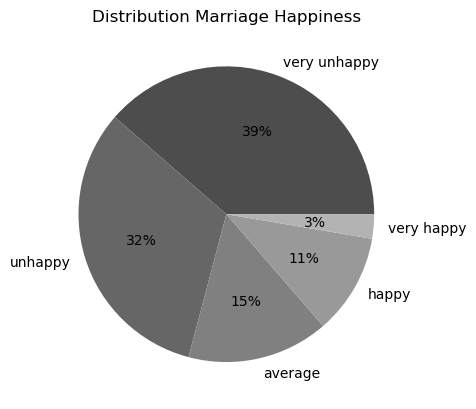

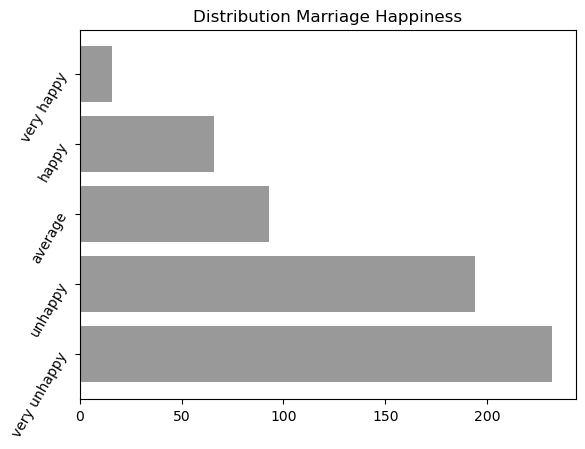

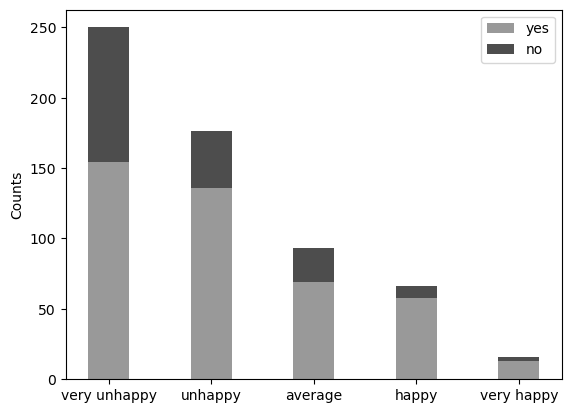

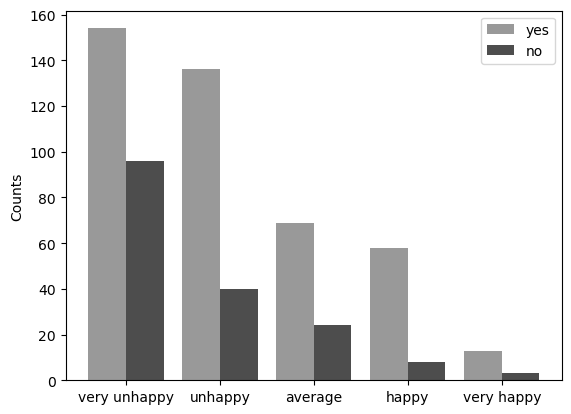

In [4]:
# Visualize it

counts = Y.value_counts()
counts_bykids = Y.groupby(X).value_counts()
counts_yes  = counts_bykids['yes']
counts_no = counts_bykids['no']

labels_y = ['very unhappy', 'unhappy', 'average', 'happy', 'very happy']
# Pie chart (a)
plt.title("Distribution Marriage Happiness")
grey_colors = ['0.3', '0.4', '0.5', '0.6', '0.7']
plt.pie(counts, labels=labels_y, colors=grey_colors, autopct='%.0f%%')
plt.show()

# Horizontal bar chart (b)
y_pos = [0, 1, 2, 3, 4]
plt.title("Distribution Marriage Happiness")
plt.barh(y_pos, counts, color='0.6')
plt.yticks(y_pos, labels_y, rotation=60)
plt.show()

# Stacked bar plot
x_pos = [0, 1, 2, 3, 4]
## The first bar
plt.bar(x_pos, counts_yes, width=0.4, color='0.6', label='yes')
## The second bar
plt.bar(x_pos, counts_no, width=0.4, 
        color='0.3', label='no', bottom=counts_yes,)
plt.ylabel("Counts")
plt.xticks(x_pos, labels_y)
plt.legend()
plt.show()

# Grouped bar plot
x_pos_leftbar = [-0.2, 0.8, 1.8, 2.8, 3.8]
## The first bar
plt.bar(x_pos_leftbar, counts_yes, width=0.4, color='0.6', label='yes')
## The second bar
x_pos_rightbar = [0.2, 1.2, 2.2, 3.2, 4.2]
plt.bar(x_pos_rightbar, counts_no, width=0.4, 
        color='0.3', label='no')
plt.ylabel("Counts")
plt.xticks(x_pos, labels_y)
plt.legend()
plt.show()

## B. Continuous Distributions: Histogram and Density

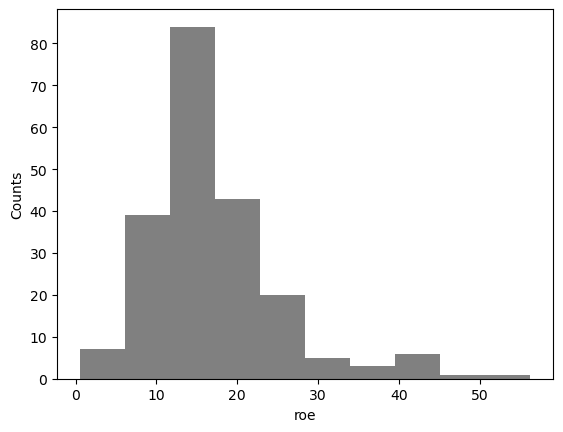

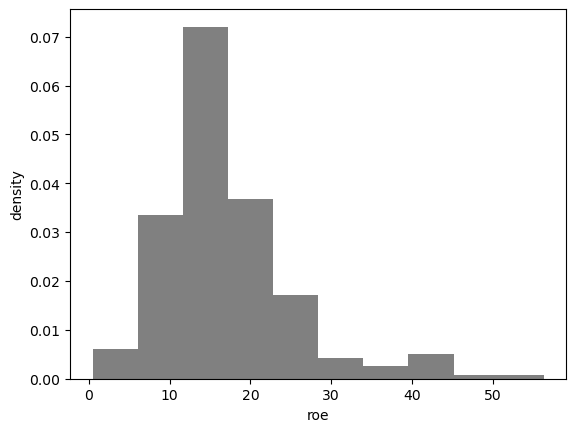

In [5]:
ceosal1 = woo.dataWoo('ceosal1')

# Extract roe
roe = ceosal1['roe']

# Plot historgram (with counts):
plt.hist(roe, color='grey')
plt.ylabel('Counts')
plt.xlabel('roe')
plt.show()

# Plot density plot
# breaks = [0, 5, 10, 20, 30, 60]
plt.hist(roe, color='grey', density=True)
plt.ylabel('density')
plt.xlabel('roe')
plt.show()

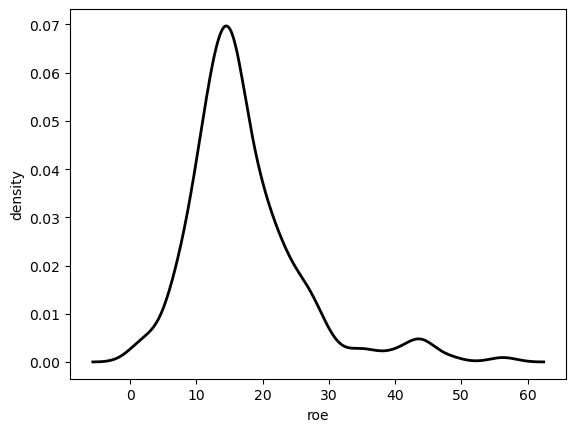

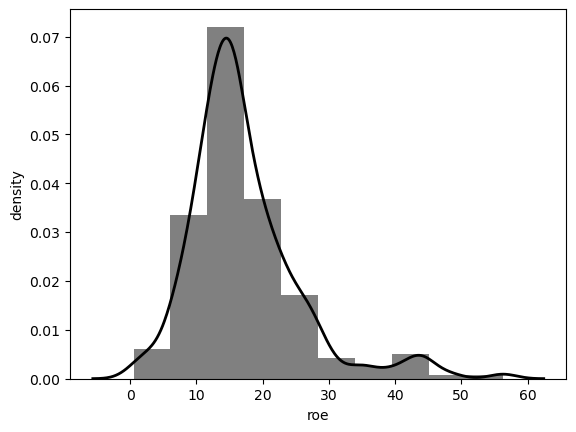

In [6]:
# Estimate kernel density
kde = sm.nonparametric.KDEUnivariate(roe)
kde.fit()

# Kernel density
plt.plot(kde.support, kde.density, color='black', linewidth=2)
plt.ylabel('density')
plt.xlabel('roe')
plt.show()

# Kernel density overlayed histogram
plt.hist(roe, color='grey', density=True)
plt.plot(kde.support, kde.density, color='black', linewidth=2)
plt.ylabel('density')
plt.xlabel('roe')
plt.show()

## C. Empirical Cumulative Distribution Function (ECDF)

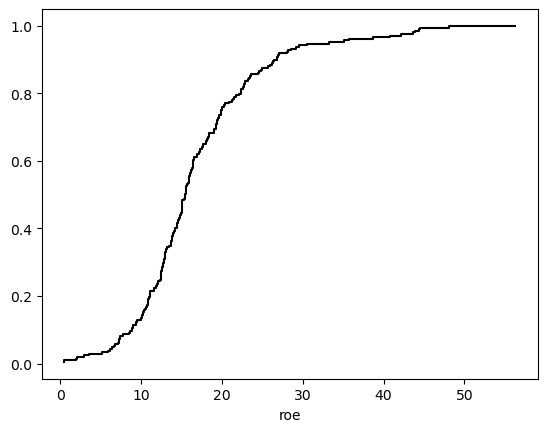

In [7]:
# Calculate Empirical Cumulative Distribution Function (ECDF)
x = np.sort(roe)
n = x.size
y = np.arange(1, n + 1) / n

# Plot a step function
plt.step(x, y, linestyle='-', color='black')
plt.xlabel('roe')
plt.show()

## D. Fundamental Statistics

In [8]:
# Extract roe and salary
roe = ceosal1['roe']
salary = ceosal1['salary']

# Sample average
roe_mean = np.mean(salary)
print(f"roe_mean: {roe_mean}")

# Sample median
roe_med = np.median(salary)
print(f"roe_med: {roe_med}")

# Standard deviation
roe_std = np.std(salary, ddof=1)
print(f"roe_std: {roe_std}")

# Correlation with ROE
roe_corr = np.corrcoef(roe, salary)
print(f"roe_corr: \n{roe_corr}")

roe_mean: 1281.1196172248804
roe_med: 1039.0
roe_std: 1372.3453079588883
roe_corr: 
[[1.         0.11484173]
 [0.11484173 1.        ]]


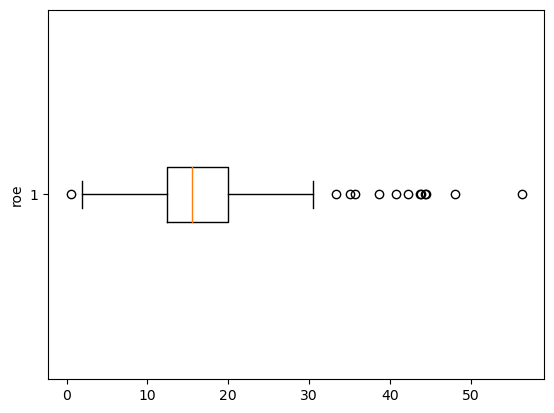

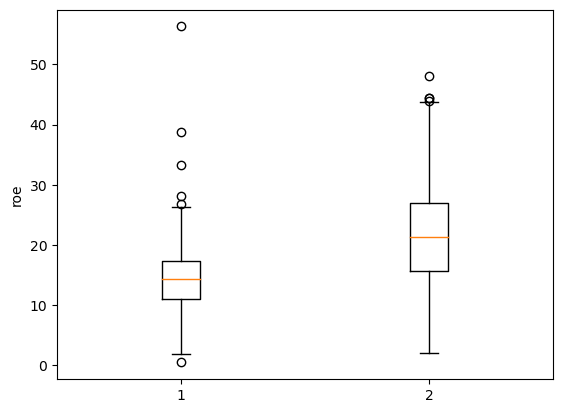

In [9]:
# Extract roe and consprod
roe = ceosal1['roe']
consprod = ceosal1['consprod']

# Plotting descriptive statistics
plt.boxplot(roe, vert=False)
plt.ylabel('roe')
plt.show()

# Plotting descriptive statistics
roe_cp0 = roe[consprod == 0]
roe_cp1 = roe[consprod == 1]

plt.boxplot([roe_cp0, roe_cp1])
plt.ylabel('roe')
plt.show()

# Probability Distributions

![Image](images/functional_descriptive.png)

## A. Discrete Distributions

In [10]:
def binomial(x, n, p):
    combination = math.factorial(n) / (math.factorial(x) * math.factorial(n - x))
    return combination * (p ** x) * ((1 - p) ** (n - x))

n = 10
x = 2
p = 0.2
# Pedestrian approach
p1 = binomial(x, n, p)
print(f"Pedestrian function: {p1}")
# Scipy function
p2 = stats.binom.pmf(x, n, p)
print(f"Scipy function: {p2}")

Pedestrian function: 0.3019898880000002
Scipy function: 0.30198988800000004


Result: 
       x            fx
0    0.0  1.073742e-01
1    1.0  2.684355e-01
2    2.0  3.019899e-01
3    3.0  2.013266e-01
4    4.0  8.808038e-02
5    5.0  2.642412e-02
6    6.0  5.505024e-03
7    7.0  7.864320e-04
8    8.0  7.372800e-05
9    9.0  4.096000e-06
10  10.0  1.024000e-07


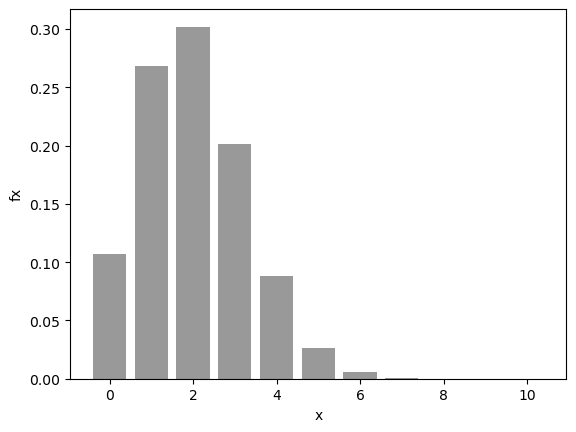

In [11]:
# Variables
p = 0.2
n = 10

# Input for x (0 and 10)
x = np.linspace(0, 10, num=11)

# Probability Mass Function for all these values
fx = stats.binom.pmf(x, n, p)

# Collect results
result = pd.DataFrame({'x': x, 'fx': fx})
print(f"Result: \n{result}")

# Plot
plt.bar(x, fx, color='0.6')
plt.ylabel('fx')
plt.xlabel('x')
plt.show()

## B. Continuous Distributions

Result: 
           x        fx
0  -4.000000  0.000134
1  -3.919192  0.000184
2  -3.838384  0.000252
3  -3.757576  0.000343
4  -3.676768  0.000463
..       ...       ...
95  3.676768  0.000463
96  3.757576  0.000343
97  3.838384  0.000252
98  3.919192  0.000184
99  4.000000  0.000134

[100 rows x 2 columns]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (11,).

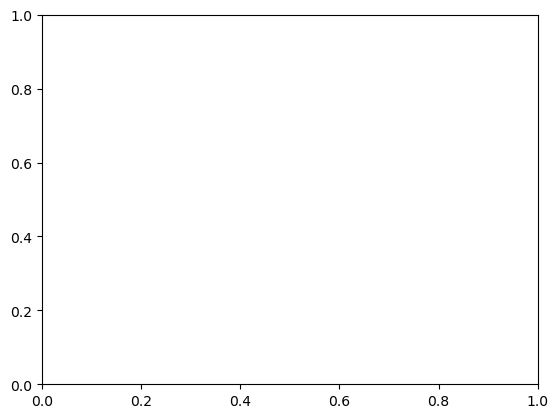

In [13]:
# Input for x variables
x = np.linspace(-4, 4, num=100)

# Probability Density Function (standardized) for all these values
pdf_x = stats.norm.pdf(x)

# Collect results
result = pd.DataFrame({'x': x, 'fx': pdf_x})
print(f"Result: \n{result}")

# Plot
plt.bar(x, pdf_x, color='0.6')
plt.ylabel('pdf_x')
plt.xlabel('x')
plt.show()

## C. Cumulative Distribution Function

In [ ]:
# Binomial CDF:
x = 3
n = 10
p = 0.2
p1 = stats.binom.cdf(3, 10, 0.2)
print(f"Binomial CDF: {p1}")

# Normal CDF:
p2 = stats.norm.cdf(1.96) - stats.norm.cdf(-1.96)
print(f"Normal CDF 95% total area: {p2}")

In [ ]:
# Plotting cumulative distribution function

# Case binomial
p = 0.2
n = 10

x_binom = np.linspace(-1, 10, num=1000)
Fx = stats.binom.cdf(x_binom, n, p)

plt.title('Distribution Cumulative Discrete')
plt.step(x_binom, Fx, linestyle='-', color='black')
plt.xlabel('x')
plt.ylabel('Fx')
plt.show()

# Case normal
x_norm = np.linspace(-4, 4, num=1000)

cdf_norm = stats.norm.cdf(x_norm)

plt.title('Distribution Cumulative Continuous')
plt.plot(x_norm, cdf_norm, linestyle='-', color='black')
plt.xlabel('x')
plt.ylabel('Fx')
plt.show()

![Image](images/Example_B-6.png)

In [ ]:
# Assume distribution X ~ Normal(4, 9) => mean = 4 and var = 9
mu = 4
var = 9
std = var ** 0.5

# 1. P(2 < X <= 6)
# Standardization approach:
z1 = (2 - mu) / std
z2 = (6 - mu) / std
p1 = stats.norm.cdf(z2) - stats.norm.cdf(z1)
# p2 = stats.norm.cdf(6, mu, std) - stats.norm.cdf(2, mu, std)
print(f"Answer no 1: {round(p1, 3)}")
# 2. P(|X| > 2) 
# similar: 1 - [P(-2 < X < 2)]
p3 = 1 - (stats.norm.cdf(2, mu, std) - stats.norm.cdf(-2, mu, std))
print(f"Answer no 2: {round(p3, 3)}")

## D. Random Draws from Probability Distributions

In [ ]:
# 1. Random sampling bernoulli (it returns 0 or 1)
p = 0.5
bernoulli = stats.bernoulli.rvs(p, size=10)
print(f"Sample bernoulli: \n{bernoulli}")

# 2. Random sampling normal (it returns normal distributions)
normal = stats.norm.rvs(size=10)
print(f"Sample normal: \n{normal}")

# Confidence Intervals and Statistical Inference

## A. Confidence Intervals

![images](images/Example_C-2.png)

NOTES: Table C.3 lists the scrap rates—measured as number of items per 100 produced that are not usable and therefore need to be scrapped—for 20 firms. Each of these
firms received a job training grant in 1988; there were no grants awarded in 1987

In [17]:
# Manually enter raw data from Wooldridge, Table C.3
scrap_rates87 = np.array([10, 1, 6, .45, 1.25, 1.3, 1.06, 3, 8.18, 1.67,
                          .98, 1, .45, 5.03, 8, 9, 18, .28, 7, 3.97])
scrap_rates88 = np.array([3, 1, 5, .5, 1.54, 1.5, .8, 2, .67, 1.17,
                          .51, .5, .61, 6.7, 4, 7, 19, .2, 5, 3.83])

# Calculate change
change = scrap_rates88 - scrap_rates87

n = len(change)
avgCh = np.mean(change)
print(f"Average Change: {round(avgCh, 3)}")

sdCh = np.std(change, ddof=1)
se = sdCh / np.sqrt(n)
print(f"Standard Error: {round(se, 3)}")

# Critical level
critical_lvl = stats.t.ppf(0.975, n - 1) # critical level
print(f"Critical Level: {round(critical_lvl, 3)}")

# Confidence Interval
lowerCI = avgCh - critical_lvl * se
print(f"Lower Confidence Interval: {round(lowerCI, 3)}")

upperCI = avgCh + critical_lvl * se
print(f"Upper Confidence Interval: {round(upperCI, 3)}")

Average Change: -1.154
Standard Error: 0.537
Critical Level: 2.093
Lower Confidence Interval: -2.278
Upper Confidence Interval: -0.031


![images](images/Example_C-3.png)

In [18]:
# Extract data
audit = woo.dataWoo('audit')
y = audit['y']

# Calculate average and std error
n = len(y)
avg = np.mean(y)
std = np.std(y, ddof=1)
std_err = std / np.sqrt(n)

# Calculate confidence interval 97.5%
c_lvl = stats.norm.ppf(.975) # critical level
upperCI = avg + (c_lvl * std_err)
lowerCI = avg - (c_lvl * std_err)
print(f"Confidence Interval 97,5%")
print(f"Upper Level : {round(upperCI, 3)} ")
print(f"Lower Level: {round(lowerCI, 3)}")

# Calculate confidence interval 99%
c_lvl = stats.norm.ppf(.99)
upperCI = avg + (c_lvl * std_err)
lowerCI = avg - (c_lvl * std_err)
print(f"\nConfidence Interval 99%")
print(f"Upper Level : {round(upperCI, 3)} ")
print(f"Lower Level: {round(lowerCI, 3)}")

# Calculate confidence interval 95%
c_lvl = stats.norm.ppf(.95)
upperCI = avg + (c_lvl * std_err)
lowerCI = avg - (c_lvl * std_err)
print(f"\nConfidence Interval 95%")
print(f"Upper Level : {round(upperCI, 3)} ")
print(f"Lower Level: {round(lowerCI, 3)}")

Confidence Interval 97,5%
Upper Level : -0.072 
Lower Level: -0.194

Confidence Interval 99%
Upper Level : -0.061 
Lower Level: -0.205

Confidence Interval 95%
Upper Level : -0.082 
Lower Level: -0.184


![images](images/Example_C-5.png)

In [19]:
# Define problem
# H0: miu = 0
# H1: miu < 0
# This case is one tailed cases

# Extract data
audit = woo.dataWoo('audit')
y = audit['y']

# Calculate average and std error
n = len(y)
avg = np.mean(y)
std = np.std(y, ddof=1)
std_err = std / np.sqrt(n)

# Calculate its t-value
miu = 0 # expected value
t_value = (avg - miu) / std_err
print("t-value: ", t_value)

# Plot critical value for various alpha
# Note: since on the left side, we have to calculate (1 - percentage)
alpha_one_tailed = np.array([0.90, 0.95, 0.975, 0.99, 0.995, .999])
CV = stats.t.ppf(1 - alpha_one_tailed, n-1)
table = pd.DataFrame({'alpha_one_tailed': alpha_one_tailed, 'CV': CV})
print(f'table: \n{table}\n')

# The result shows that H0 fail since t-value less than all critical value

t-value:  -4.276816348963646
table: 
   alpha_one_tailed        CV
0             0.900 -1.285089
1             0.950 -1.651227
2             0.975 -1.969898
3             0.990 -2.341985
4             0.995 -2.596469
5             0.999 -3.124536



## B. Calculate p-value

![images](images/Example_C-6.png)

In [20]:
# Manually enter raw data from Wooldridge, Table C.3
scrap_rates87 = np.array([10, 1, 6, .45, 1.25, 1.3, 1.06, 3, 8.18, 1.67,
                          .98, 1, .45, 5.03, 8, 9, 18, .28, 7, 3.97])
scrap_rates88 = np.array([3, 1, 5, .5, 1.54, 1.5, .8, 2, .67, 1.17,
                          .51, .5, .61, 6.7, 4, 7, 19, .2, 5, 3.83])

# Calculate change
change = scrap_rates88 - scrap_rates87

# Calculate average and std error
n = len(change)
avg = np.mean(change)
std = np.std(change, ddof=1)
std_err = std / np.sqrt(n)


# Calculate its t-value
miu = 0 # expected value
t_value = (avg - miu) / std_err
print("t-value: ", t_value)

# Calculate p-value for H0
p_value = stats.t.cdf(t_value, n - 1)
print(f"P-value: {p_value}")

t-value:  -2.150711003973493
P-value: 0.02229062646839212


![images](images/Example_C-7.png)

In [21]:
# H0: miu = 0
# H1: miu < 0
# This case is one tailed cases

# Extract data
audit = woo.dataWoo('audit')
y = audit['y']

# Calculate average and std error
n = len(y)
avg = np.mean(y)
std = np.std(y, ddof=1)
std_err = std / np.sqrt(n)

# Calculate its t-value
miu = 0 # expected value
t_value = (avg - miu) / std_err
print("t-value: ", t_value)

# Calculate p-value for H0
p_value = stats.t.cdf(t_value, n - 1)
print(f"P-value: {p_value}")

t-value:  -4.276816348963646
P-value: 1.369270781112999e-05


# Monte Carlo Simulation (or called Random Sampling)

> Modeling the probability of different outcomes in a process or system that cannot easily be predicted due to the intervention of random variables.

In simple term:
> Generage multiple possible outcomes and calculate the average result.

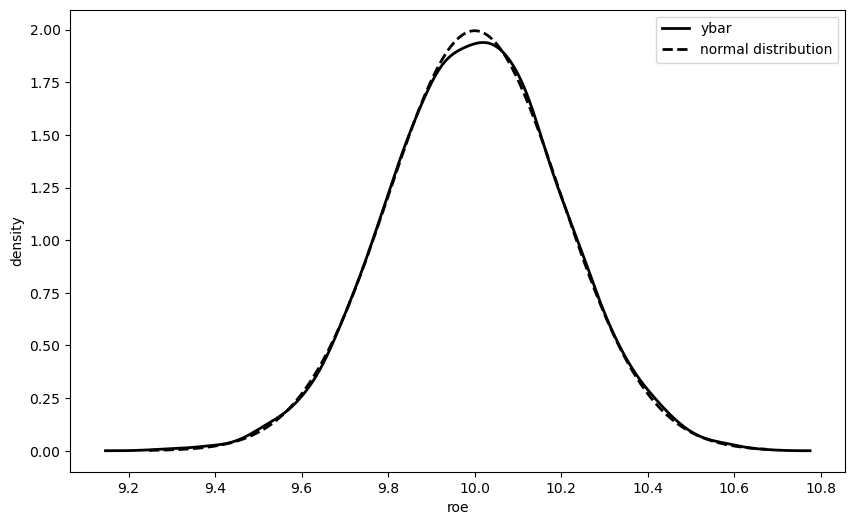

In [22]:
# set the random seed:
np.random.seed(123456)
# set sample size:
n = 100
# initialize ybar to an array of length r=10000 to later store results:
r = 10000

# Define mean and std population
mean_theoretical = 10
std_theoretical = 2 / np.sqrt(n)

# Random sampling process
ybar = np.empty(r)
# repeat r times:
for j in range(r):
    # draw a sample and store the sample mean in pos. j=0,1,... of ybar:
    sample = stats.norm.rvs(10, 2, size=n)
    ybar[j] = np.mean(sample)
    

# Plot the density distribution
plt.figure(figsize=(10, 6))

# Estimate kernel density
kde = sm.nonparametric.KDEUnivariate(ybar)
kde.fit()

# Plot the kernel density result
plt.plot(kde.support, kde.density, color="black", lw=2, label='ybar')

# Plot the theoretical normal distribution
x = np.linspace(min(ybar), max(ybar), 1000)
plt.plot(x, stats.norm.pdf(x, mean_theoretical, std_theoretical),
         'k--', lw=2, label='normal distribution')

# Kernel density
plt.ylabel('density')
plt.xlabel('roe')
plt.legend()
plt.show()